In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('data2.csv')

In [3]:
df

,Mouth_Open_mean,Mouth_Open_std,Mouth_Open_skew,Mouth_Open_median,Mouth_Open_range,Mouth_Closed_mean,Mouth_Closed_std,Mouth_Closed_skew,Mouth_Closed_median,Mouth_Closed_range,...,Scared_skew,Scared_median,Scared_range,Disgusted_mean,Disgusted_std,Disgusted_skew,Disgusted_median,Disgusted_range,Artificiality,Expressiveness
0,-0.316932,-0.139323,0.520572,0.0,0.941697,0.316932,-0.139323,-0.520572,0.0,0.941697,...,-0.970592,2.747127,1.184609,0.057078,0.414716,-0.944344,-0.372363,-0.117168,2,1
1,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.646273,1.371597,1.610766,-0.433304,-0.478654,-0.305011,-0.390614,-0.611292,2,1
2,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.576356,-0.449818,-0.762836,0.141593,0.052487,-0.552835,0.188107,0.401741,2,1
3,-0.370426,-0.525913,5.275935,0.0,0.941697,0.370426,-0.525913,-5.275935,0.0,0.941697,...,0.058838,-0.522081,-0.724757,-0.432911,-0.389509,2.127730,-0.388828,0.467995,2,1
4,-0.329409,-0.196029,0.666669,0.0,0.941697,0.329409,-0.196029,-0.666669,0.0,0.941697,...,-0.186299,-0.501932,-0.780710,-0.263131,-0.336069,-0.344270,-0.218242,-0.146029,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.065881,0.497312,-0.098430,0.0,0.941697,0.065881,0.497312,0.098430,0.0,0.941697,...,-0.044906,-0.480628,-0.737813,-0.370943,-0.445075,-0.096357,-0.307964,-0.647984,1,2
76,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.784188,-0.447860,-0.894541,1.152373,0.734544,-1.101117,1.321316,0.536515,1,2
77,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.594041,1.841547,1.062892,-0.291811,-0.449079,-0.938267,-0.219532,-0.727922,1,2
78,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.832775,1.096518,0.680805,-0.384148,-0.495723,-0.622063,-0.321983,-0.617139,1,2


In [4]:
# Extract features by dropping target columns from the dataset
X = df.drop(['Expressiveness','Artificiality'], axis=1)  
# Extract target variable 'Expressiveness' from the dataset
y = df['Expressiveness'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


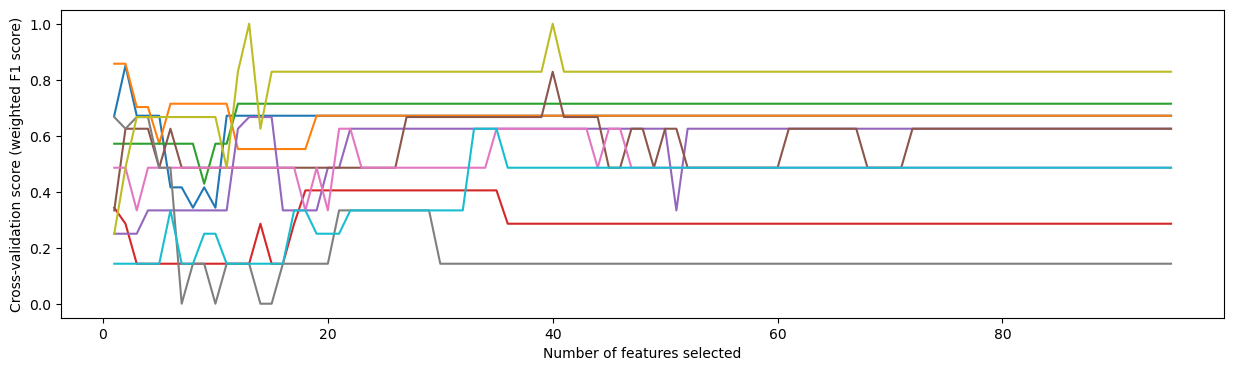

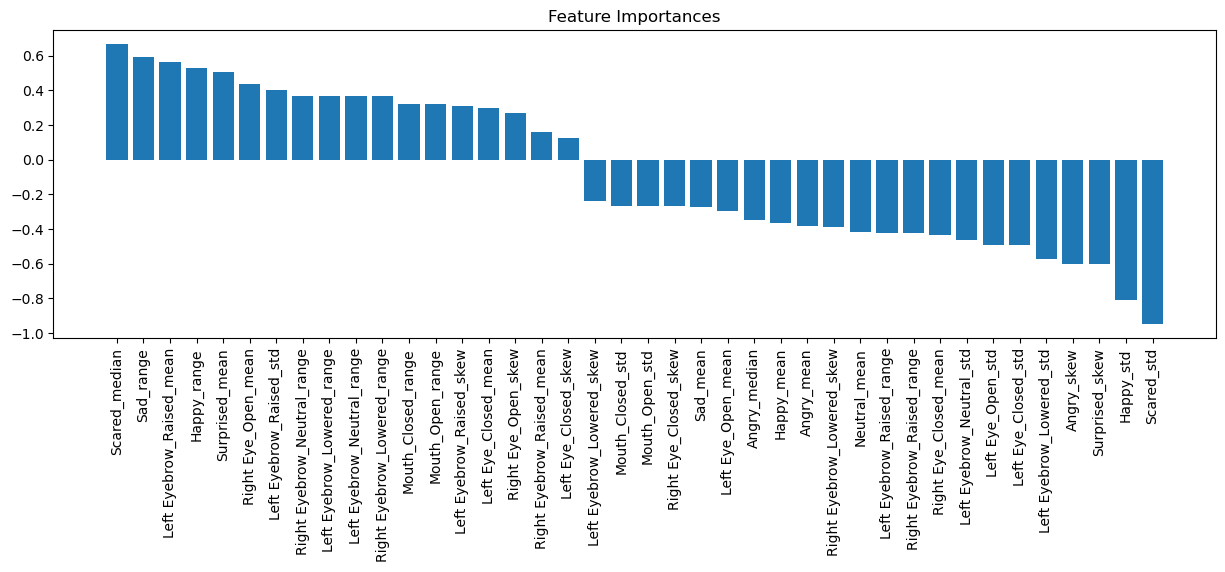

Final F1 Score on training data with 40 features: 0.9531135531135531
Final F1 Score on test data with 40 features: 0.43529411764705883
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95        32
           2       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.43      0.38      0.40         8
           2       0.44      0.50      0.47         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16



In [5]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', C=1, random_state=42, probability=True))
])

# Initialize RFECV
selector = RFECV(estimator=pipeline.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (weighted F1 score)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector.support_) if s]

# Fit the pipeline on the optimal features
pipeline.fit(X_train[optimal_features], y_train)

# Plot the SVC coefficients for the selected features
if hasattr(pipeline.named_steps['classifier'], "coef_"):
    importances = pipeline.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 4))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)
    plt.show()

# Make predictions using the pipeline
y_train_pred_final = pipeline.predict(X_train[optimal_features])
y_test_pred_final = pipeline.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='weighted')
f1_test_final = f1_score(y_test, y_test_pred_final, average='weighted')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


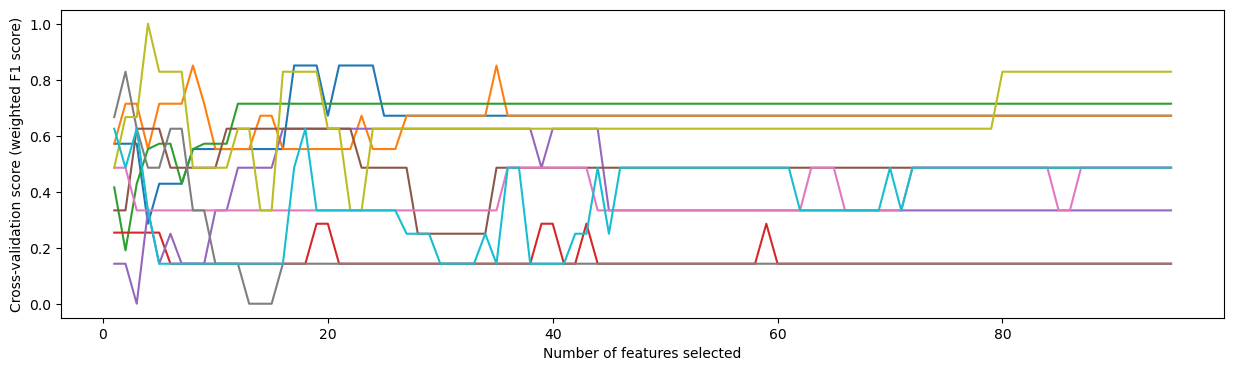

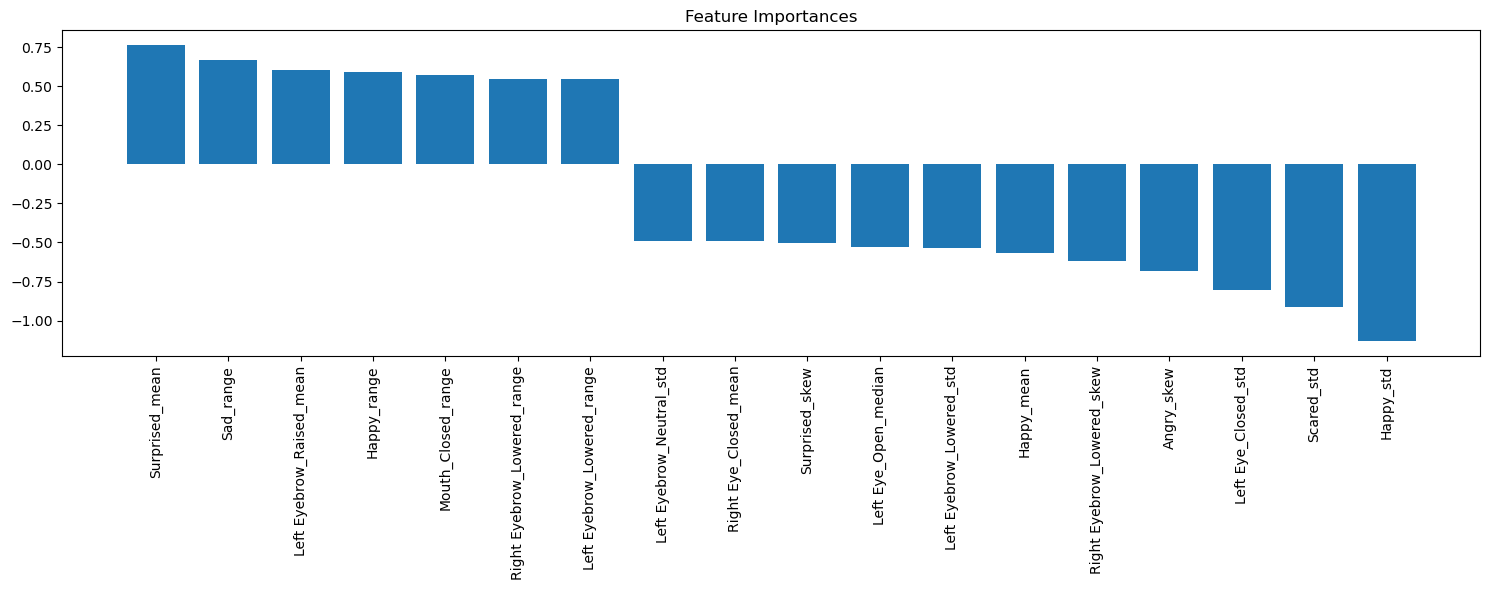

Final F1 Score on training data with 18 features: 0.8748778103616813
Final F1 Score on test data with 18 features: 0.5
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.90      0.84      0.87        32
           2       0.85      0.91      0.88        32

    accuracy                           0.88        64
   macro avg       0.88      0.88      0.87        64
weighted avg       0.88      0.88      0.87        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         8
           2       0.50      0.50      0.50         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.50        16
weighted avg       0.50      0.50      0.50        16



In [6]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Initialize RFECV
selector = RFECV(estimator=pipeline.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (weighted F1 score)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector.support_) if s]

# Fit the pipeline on the optimal features
pipeline.fit(X_train[optimal_features], y_train)

# Plot the Logistic Regression coefficients for the selected features
if hasattr(pipeline.named_steps['classifier'], "coef_"):
    importances = pipeline.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), names, rotation=90)
    plt.tight_layout()
    plt.show()

# Make predictions using the pipeline
y_train_pred_final = pipeline.predict(X_train[optimal_features])
y_test_pred_final = pipeline.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='weighted')
f1_test_final = f1_score(y_test, y_test_pred_final, average='weighted')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

In [7]:
# Extract features by dropping target columns from the dataset
X = df.drop(['Expressiveness','Artificiality'], axis=1)  
# Extract target variable 'Artificiality' from the dataset
y = df['Artificiality'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


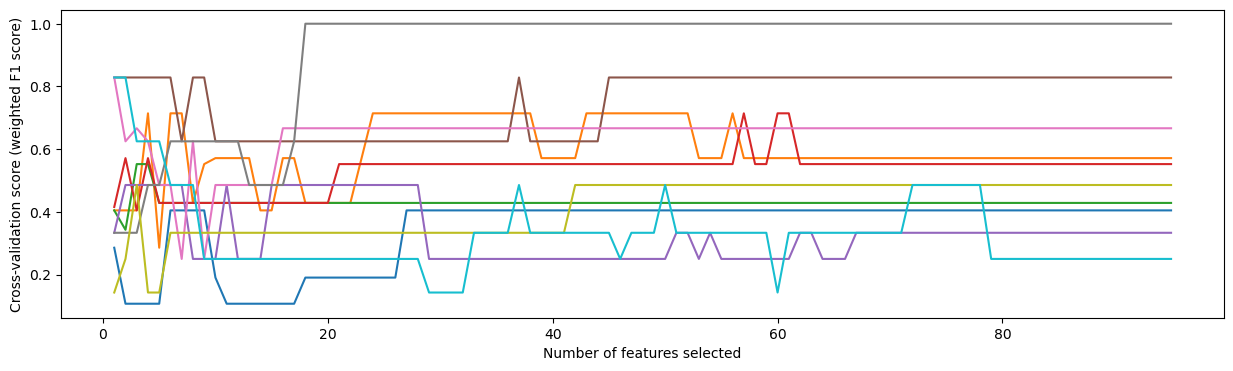

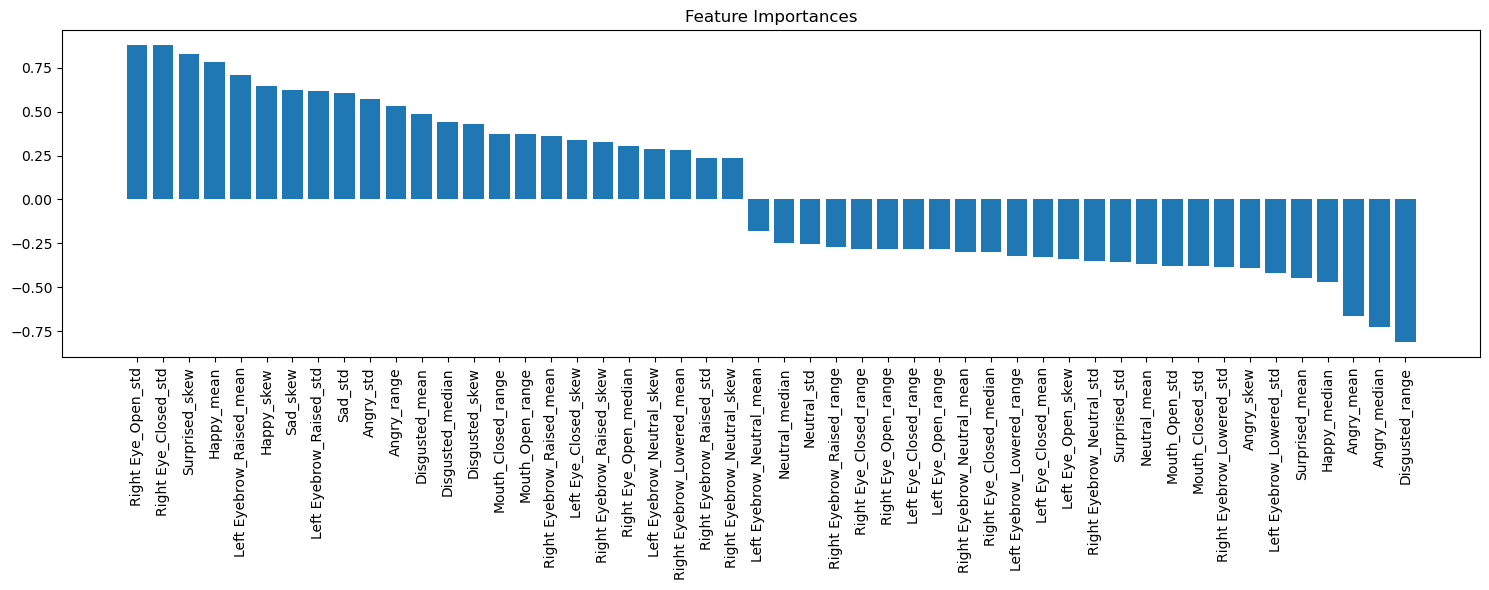

Final F1 Score on training data with 50 features: 0.9375
Final F1 Score on test data with 50 features: 0.6862745098039216
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        32
           2       0.94      0.94      0.94        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.67      0.75      0.71         8
           2       0.71      0.62      0.67         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16



In [8]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Initialize RFECV
selector = RFECV(estimator=pipeline.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (weighted F1 score)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector.support_) if s]

# Fit the pipeline on the optimal features
pipeline.fit(X_train[optimal_features], y_train)

# Plot the Logistic Regression coefficients for the selected features
if hasattr(pipeline.named_steps['classifier'], "coef_"):
    importances = pipeline.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), names, rotation=90)
    plt.tight_layout()
    plt.show()

# Make predictions using the pipeline
y_train_pred_final = pipeline.predict(X_train[optimal_features])
y_test_pred_final = pipeline.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='weighted')
f1_test_final = f1_score(y_test, y_test_pred_final, average='weighted')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


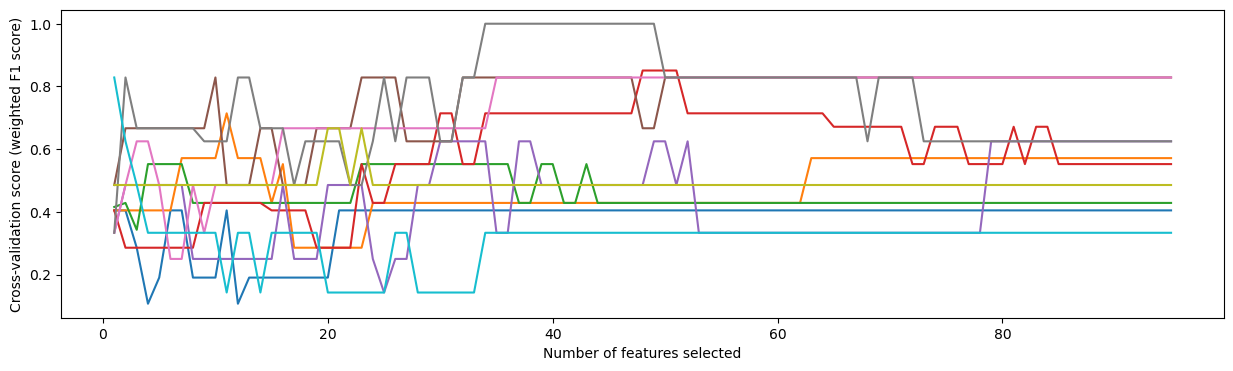

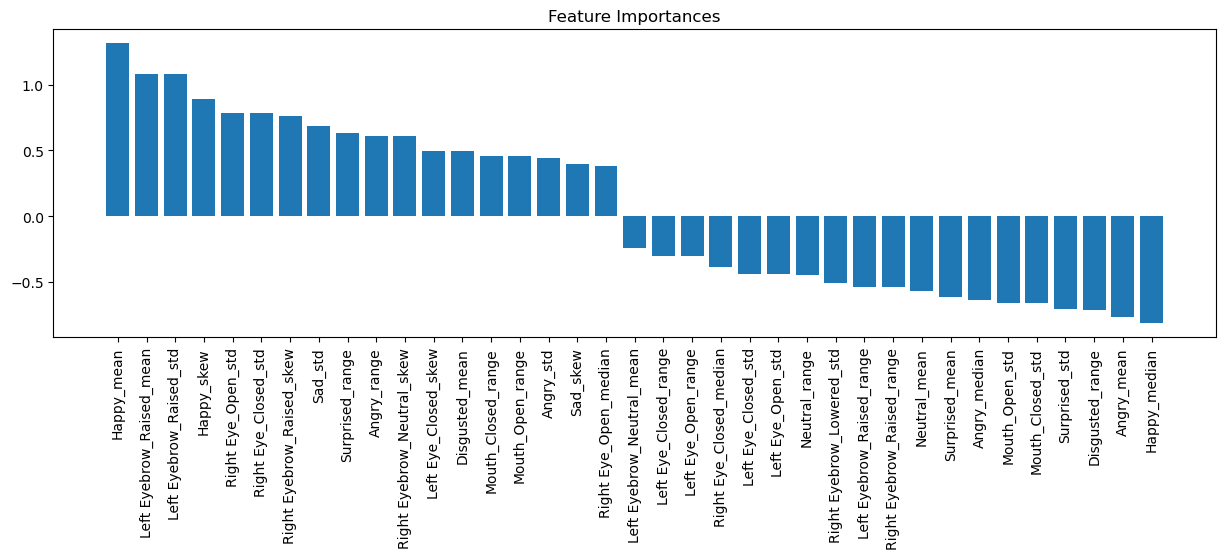

Final F1 Score on training data with 37 features: 0.9843711843711844
Final F1 Score on test data with 37 features: 0.746031746031746
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       1.00      0.97      0.98        32

    accuracy                           0.98        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78         8
           2       0.83      0.62      0.71         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



In [9]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', C=1, random_state=42, probability=True))
])

# Initialize RFECV
selector = RFECV(estimator=pipeline.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (weighted F1 score)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector.support_) if s]

# Fit the pipeline on the optimal features
pipeline.fit(X_train[optimal_features], y_train)

# Plot the SVC coefficients for the selected features
if hasattr(pipeline.named_steps['classifier'], "coef_"):
    importances = pipeline.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 4))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)
    plt.show()

# Make predictions using the pipeline
y_train_pred_final = pipeline.predict(X_train[optimal_features])
y_test_pred_final = pipeline.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='weighted')
f1_test_final = f1_score(y_test, y_test_pred_final, average='weighted')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))